# Detecting Frauds in Financial Transactions Using Random Forest
## Data Pre-Processing to Modelling
### Steps taken in the entire project :
#### Step 1 - Importing necessary Libraries
#### Step 2 - Reading the Dataset
#### Step 3 - Sanity check of data
#### Step 4 - Exploratory Data Analysis (EDA)
#### Step 5 - Missing value treatments
#### Step 6 - Outlier treatments
#### Step 7 - Duplicates and Garbage value treatments
#### Step 8 - Feature Engineering 
#### Step 9 - Encoding of data
#### Step 10 - Train-Test Splitting of Data
#### Step 11 - Baseline Modelling using Random Forest & Hyperparameter tuning

#### Last - Insights plus business recommendations

In [1]:
# Step 1 - Importing necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 2 - Reading the Dataset

df = pd.read_csv(r"C:\Users\disha\OneDrive\Desktop\Accredian Task\Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [4]:
# Step 3 - Sanity check of data

# Checking the number of rows and columns
df.shape

(6362620, 11)

In [5]:
# Checking the object/data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
# Finding any Missing Values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
# Finding duplicates
df.duplicated().sum()

np.int64(0)

In [13]:
# Identifying garbage values
for i in df.select_dtypes(include = "object").columns: 
    print(df[i].value_counts())
    print("***"*10)

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
******************************
nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
              ..
C1970706589    1
C40604503      1
C1614818636    1
C2089752665    1
C154988899     1
Name: count, Length: 6353307, dtype: int64
******************************
nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
C1049862186      1
C2118381511      1
C2099952089      1
C1027984317      1
C1251365829      1
Name: count, Length: 2722362, dtype: int64
******************************


In [14]:
# Step 4 - Exploratory Data Analysis (EDA)

# Descriptive statistics for numeric columns
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [15]:
# Descriptive statistics for non-numeric columns
df.describe(include="object")

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1677795071,C1286084959
freq,2237500,3,113


In [32]:
df.select_dtypes(include = "number").columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

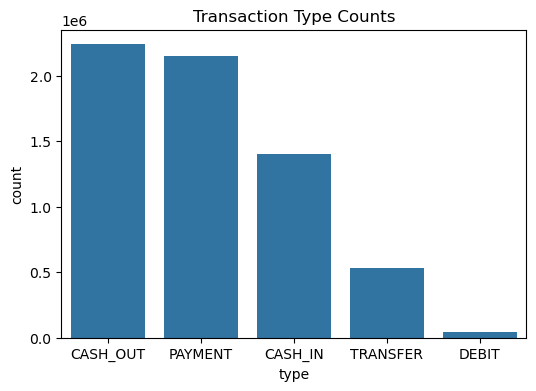

In [34]:
# Bar plot to visualize the transaction types
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
plt.title("Transaction Type Counts")
plt.show()

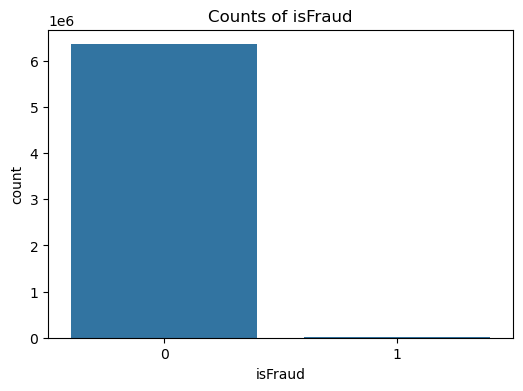

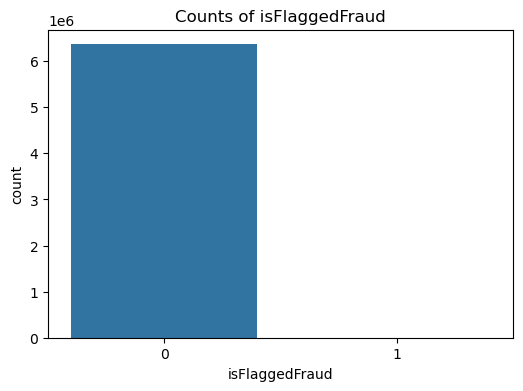

In [35]:
for col in ['isFraud', 'isFlaggedFraud']:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Counts of {col}")
    plt.show()

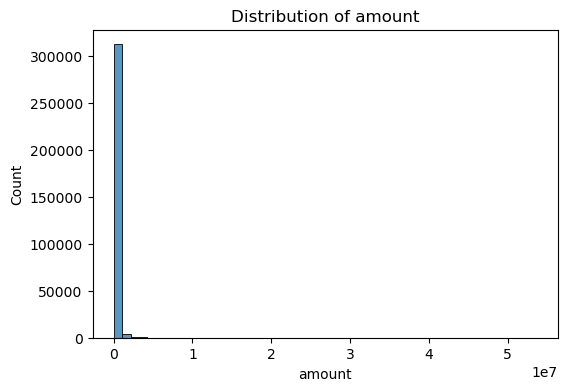

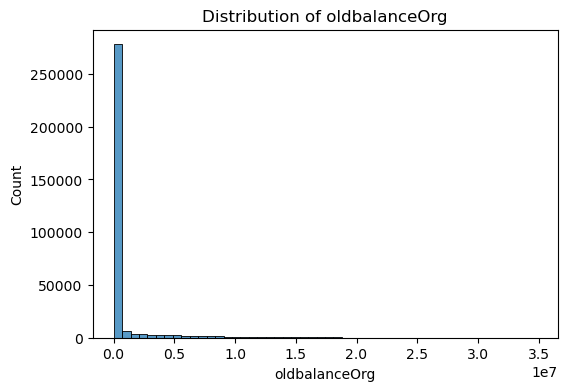

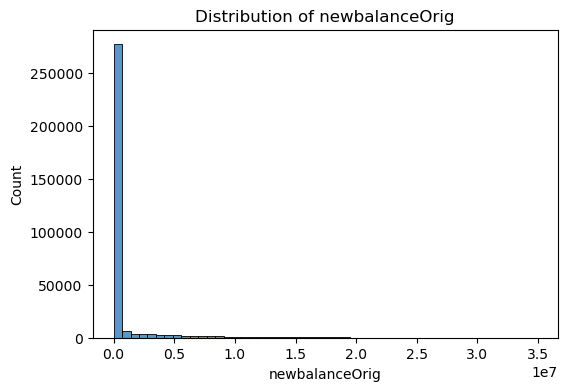

In [44]:
 # Histogram to understand the distribution of continuous numerical features

sample_df = df.sample(frac=0.05, random_state=42) #sampling a fraction of data


for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig']:
    plt.figure(figsize=(6,4))
    sns.histplot(sample_df[col], bins=50)  
    plt.title(f"Distribution of {col}")
    plt.show()

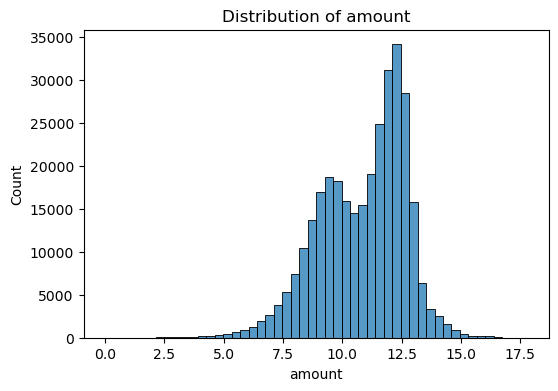

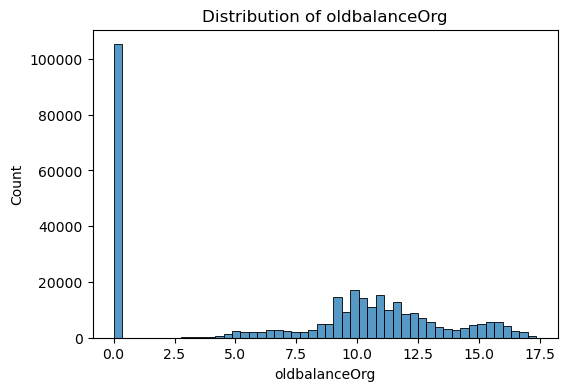

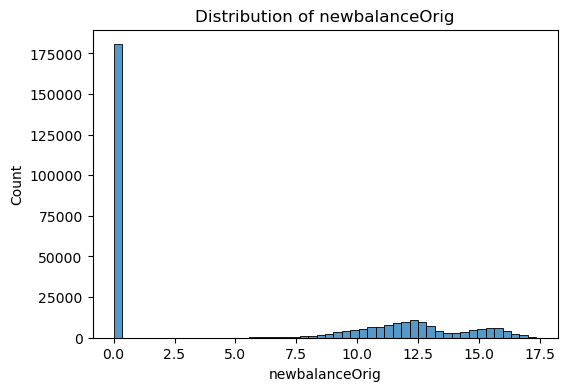

In [45]:
# Using the np.log1p(x) to see the skewed distributions a little more easily



for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig']:
    plt.figure(figsize=(6,4))
    sns.histplot(np.log1p(sample_df[col]), bins=50)  
    plt.title(f"Distribution of {col}")
    plt.show()

C:\Users\disha\AppData\Local\Temp\ipykernel_28504\3225929974.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='isFraud', y=np.log1p(sample_df[col]), data=sample_df, scale="width", inner = "quart")


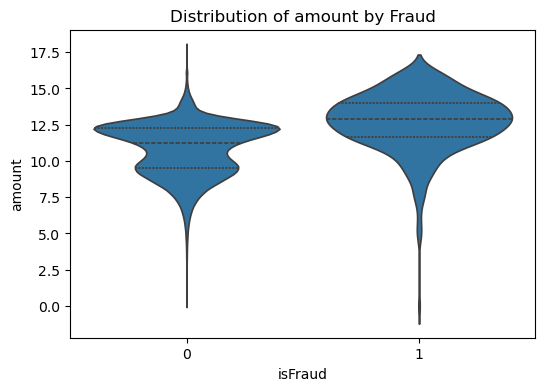

C:\Users\disha\AppData\Local\Temp\ipykernel_28504\3225929974.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='isFraud', y=np.log1p(sample_df[col]), data=sample_df, scale="width", inner = "quart")


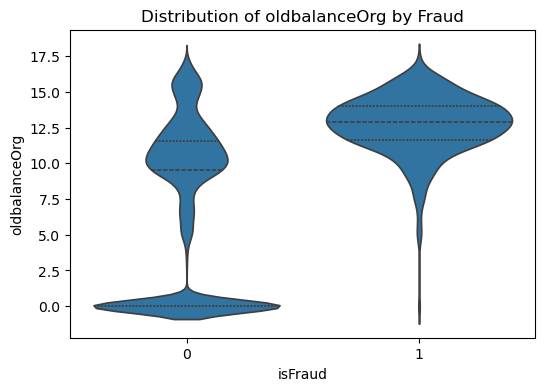

C:\Users\disha\AppData\Local\Temp\ipykernel_28504\3225929974.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='isFraud', y=np.log1p(sample_df[col]), data=sample_df, scale="width", inner = "quart")


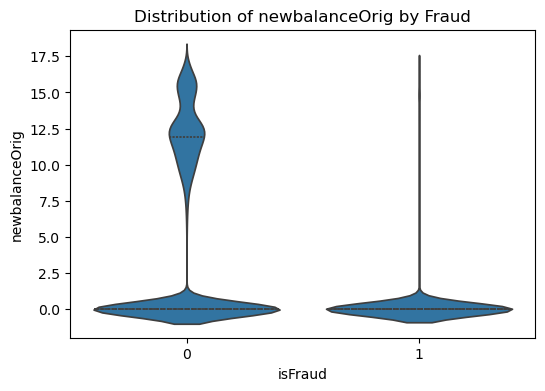

C:\Users\disha\AppData\Local\Temp\ipykernel_28504\3225929974.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='isFraud', y=np.log1p(sample_df[col]), data=sample_df, scale="width", inner = "quart")


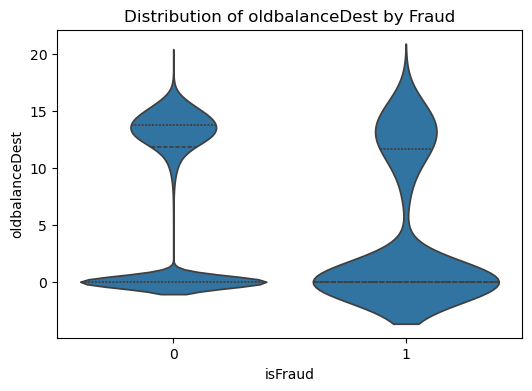

C:\Users\disha\AppData\Local\Temp\ipykernel_28504\3225929974.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='isFraud', y=np.log1p(sample_df[col]), data=sample_df, scale="width", inner = "quart")


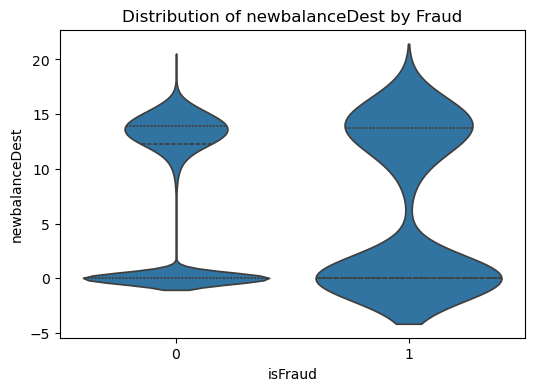

In [46]:
# Violinplot to understand the relationships
num_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='isFraud', y=np.log1p(sample_df[col]), data=sample_df, scale="width", inner = "quart")
    plt.title(f"Distribution of {col} by Fraud")
    plt.show()

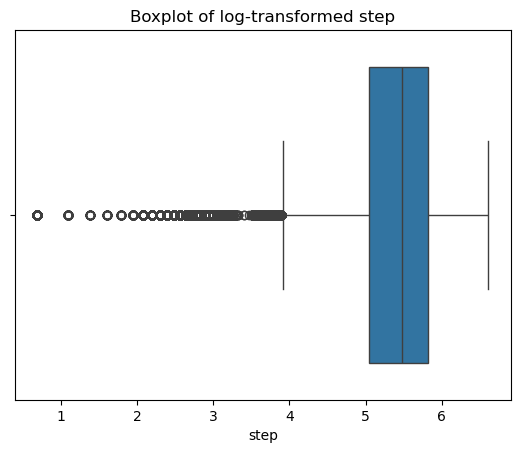

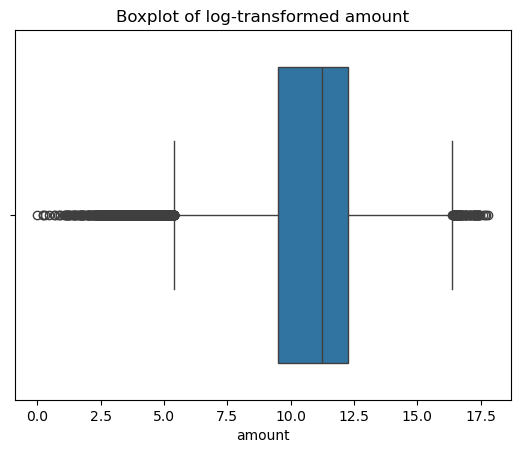

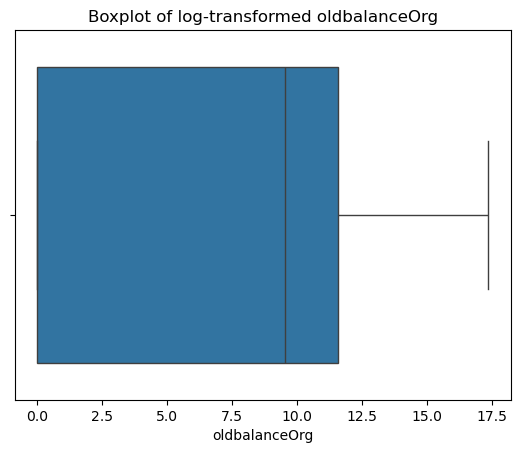

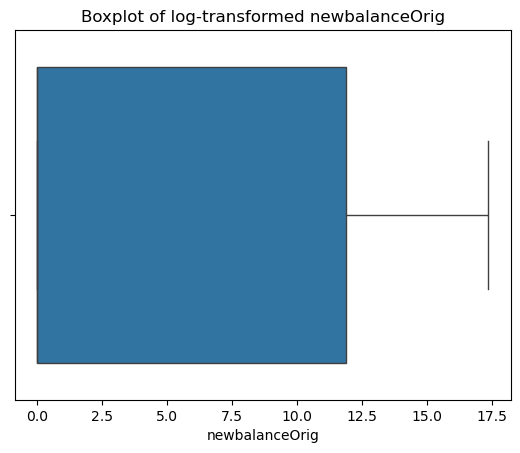

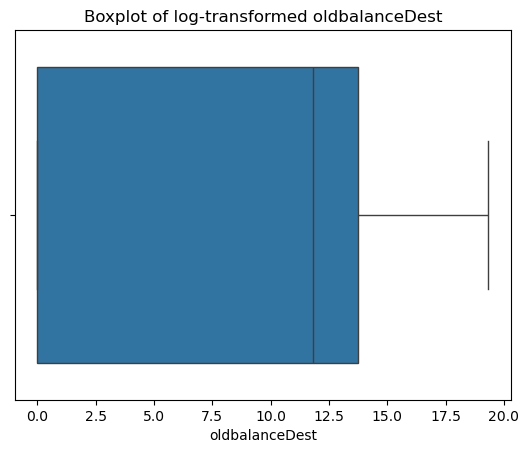

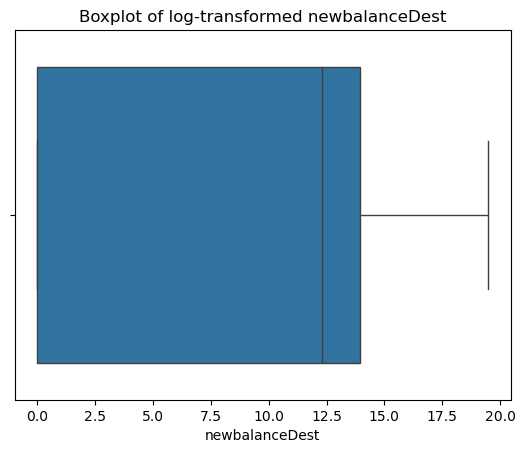

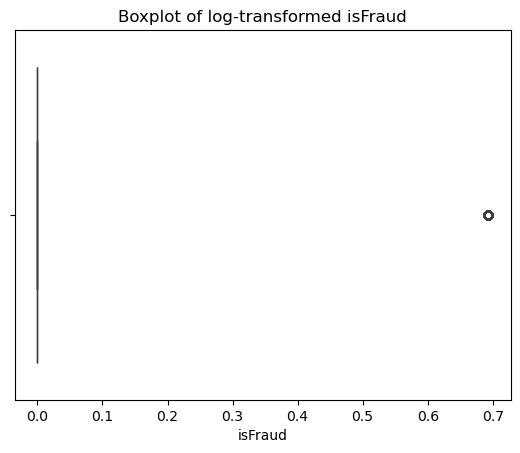

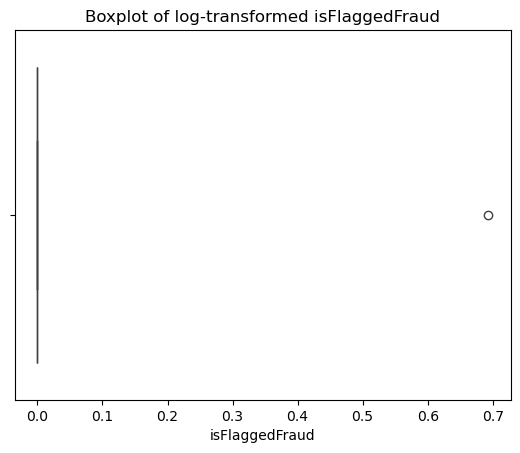

In [47]:
# Boxplot to identify outliers
for i in df.select_dtypes(include = "number").columns:
    sns.boxplot(x = np.log1p(sample_df[i]))
    plt.title(f"Boxplot of log-transformed {i}")
    plt.show()

In [42]:
# Correlation with heatmap to interpret the relation and multicollinearity
s = df.select_dtypes(include = "number").corr()
print(s)

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   
isFlaggedFraud  0.003277  0.012295       0.003835        0.003776   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.027665        0.025888  0.031578        0.003277  
amount                0.294137        0.459304  0.076688        0.012295  
oldbalanceOrg         0.066243        0.042029  0.010154        0.003835  
newbalanceOrig        0.067812        0.041837 -0.008148        0.003776  
old

<Axes: >

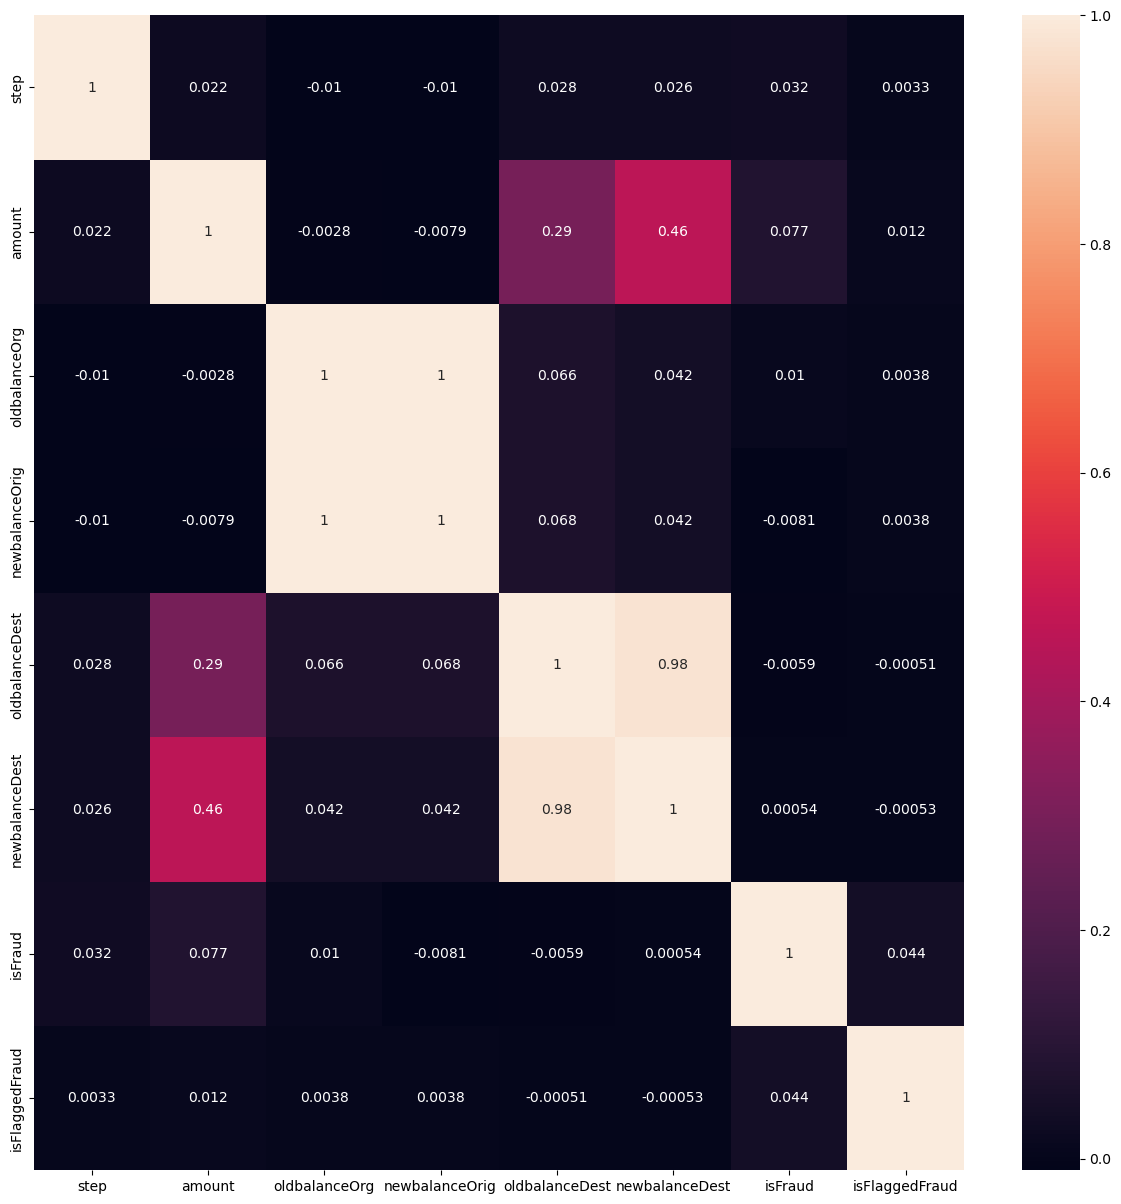

In [43]:
plt.figure(figsize=(15,15))
sns.heatmap(s, annot = True)

In [ ]:
# Step 5 - Missing Value Treatment

"""Since, there are no missing values in this dataset, so skipping this step"""

In [48]:
# Step 6 - Outlier Treatment

## a) Identifying outliers using IQR
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

amount: 338078 outliers
oldbalanceOrg: 1112507 outliers
newbalanceOrig: 1053391 outliers
oldbalanceDest: 786135 outliers
newbalanceDest: 738527 outliers


In [49]:
## b) Treating the outliers using log-transform
for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig']:
    df[col+'_log'] = np.log1p(df[col])

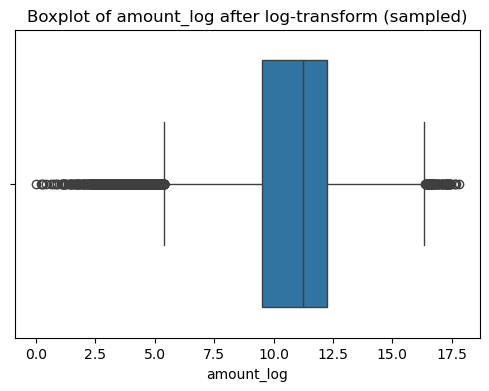

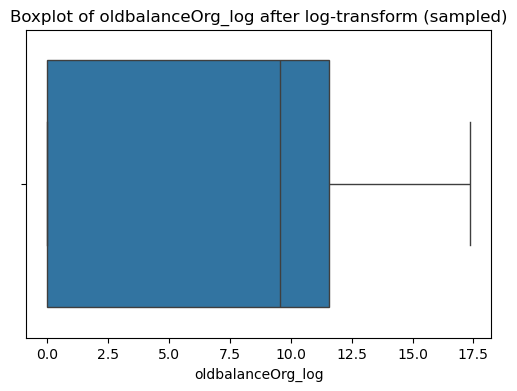

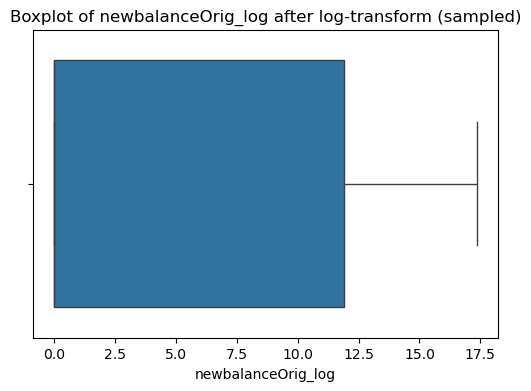

In [51]:
sample_df = df.sample(frac=0.05, random_state=42)  

for col in ['amount_log', 'oldbalanceOrg_log', 'newbalanceOrig_log']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=sample_df[col])
    plt.title(f"Boxplot of {col} after log-transform (sampled)")
    plt.show()


In [ ]:
# Step 7 - Duplicates and Garbage Value Treatments

"""Since, there are no duplicates we have nothing to do in the duplicates treatment"""

### In the above generated heatmap, it can be noticed that, 
### 1. oldbalanceOrg & newbalanceOrig's correlation = 0.9988 which isextremely high
### 2. oldbalanceDest & newbalanceDest's correlation = 0.9765 which is also very high
### This tells that these pairs are almost linearly dependent. So, for modeling, we might only keep one from each pair to avoid multicollinearity issues.

### Because, newbalanceOrig is basically oldbalanceOrg - amount, so it’s almost completely predictable from oldbalanceOrg and amount. Same for newbalanceDest vs oldbalanceDest.

In [52]:
# Step 8 - Feature Engineering

df['diffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['diffDest'] = df['newbalanceDest'] - df['oldbalanceDest']


In [53]:
# Step 9 - Data Encoding

## One-Hot Encoding
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [54]:
## Dropping high-cardinality identifiers for Baseline Modelling
df.drop(columns=['nameOrig','nameDest'], inplace=True)

In [58]:
# Step 10 - Train-Test split

df_sample = df.sample(frac=0.05, random_state=42)

X_sample = df_sample.drop(columns=['isFraud', 'isFlaggedFraud'])
y_sample = df_sample['isFraud']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample
)

print("Train fraud ratio:", y_train.mean())
print("Test fraud ratio:", y_test.mean())

Train fraud ratio: 0.001300568949800396
Test fraud ratio: 0.0013044776588555173


In [59]:
# Step 11 - Baseline Modelling using Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=50,         
    max_depth=10,            
    random_state=42,
    class_weight='balanced'  
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=50,
                       random_state=42)

In [60]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", auc)


Confusion Matrix:
 [[63451    93]
 [    7    76]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     63544
           1       0.45      0.92      0.60        83

    accuracy                           1.00     63627
   macro avg       0.72      0.96      0.80     63627
weighted avg       1.00      1.00      1.00     63627


ROC-AUC Score: 0.9994401943667912


In [66]:
# Hyperparameter tuning the model using RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_dist = {
    'n_estimators': [50, 100],            
    'max_depth': [10, 15, None],          
    'min_samples_split': [2, 5],          
    'min_samples_leaf': [1, 2],           
    'max_features': ['sqrt', 'log2']      
}

recall_scorer = make_scorer(recall_score)

# Randomized Search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,           
    scoring=recall_scorer,
    cv=2,                
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)
best_rf = rf_random.best_estimator_

y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:,1]

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
Confusion Matrix:
 [[63437   107]
 [    6    77]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     63544
           1       0.42      0.93      0.58        83

    accuracy                           1.00     63627
   macro avg       0.71      0.96      0.79     63627
weighted avg       1.00      1.00      1.00     63627


ROC-AUC Score: 0.9991675439008962


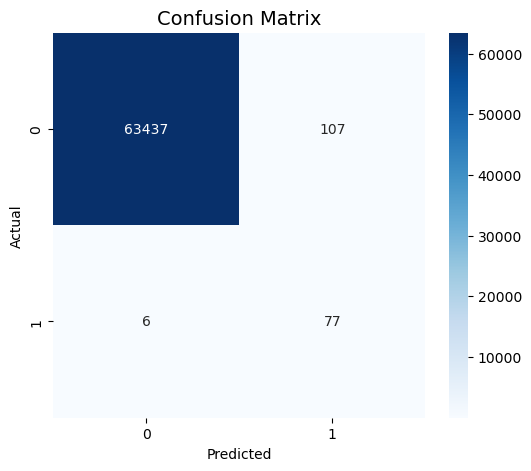

In [69]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

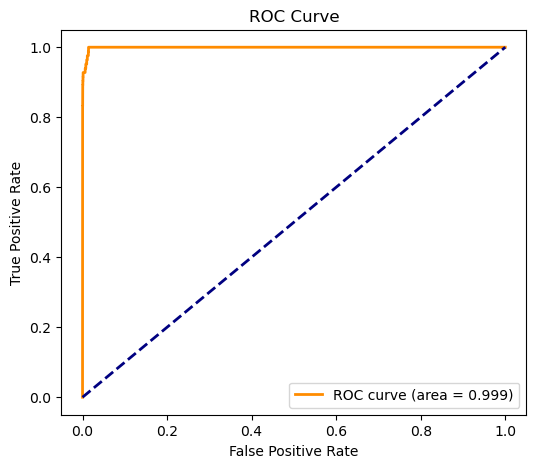

In [70]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

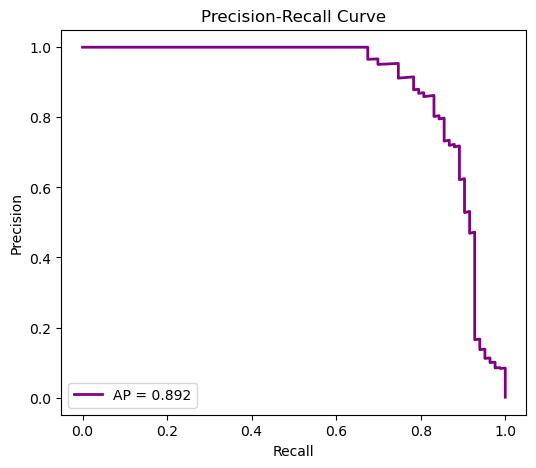

In [71]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap_score = average_precision_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='purple', lw=2, label=f'AP = {ap_score:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

C:\Users\disha\AppData\Local\Temp\ipykernel_28504\1783287696.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')


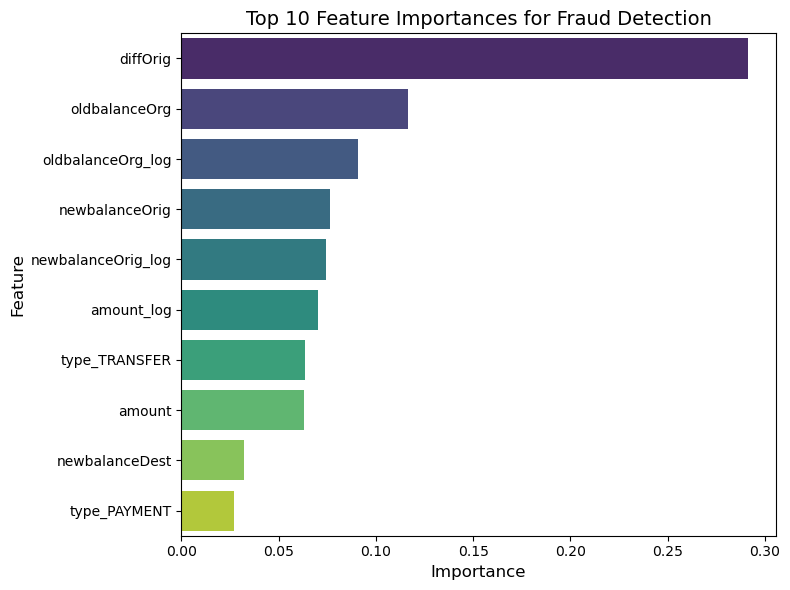

In [67]:
# Getting feature importances

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.DataFrame({
    'feature': X_train.columns,          # your feature names
    'importance': best_rf.feature_importances_
})

feature_importances = feature_importances.sort_values(by='importance', ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.title("Top 10 Feature Importances for Fraud Detection", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

## Insights and Actionable Business Suggestions/Recommendations

### 1. Data cleaning including missing values, outliers and multi-collinearity.
#### The dataset was first checked for missing values, and no nulls were found in the relevant numerical or categorical columns. To ensure data quality, outliers were detected in key numerical columns such as amount, oldbalanceOrg, newbalanceOrig, and newbalanceDest using the Interquartile Range (IQR) method. These extreme values were treated using log transform, which limits them to a threshold without completely removing them, preserving the overall distribution while reducing skew. Multi-collinearity was assessed through a correlation heatmap, revealing strong correlations between oldbalanceOrg & newbalanceOrig and oldbalanceDest & newbalanceDest. To mitigate this, derived features like differences (diffOrig, diffDest) and log-transformations were created, which help reduce skewness and maintain meaningful variance for modeling.

### 2. Describe your fraud detection model in elaboration.
#### A Random Forest Classifier was chosen for detecting fraudulent transactions due to its ability to handle large datasets efficiently, manage non-linear relationships, and provide feature importance for interpretability. The model was trained on a balanced dataset using class_weight='balanced' to address the severe class imbalance, where fraudulent transactions constituted less than 0.2% of the data. Randomized hyperparameter tuning was applied to optimize key parameters such as the number of estimators, maximum depth, minimum samples per leaf, and maximum features, ensuring the model generalized well without overfitting.

### 3. How did you select variables to be included in the model?
#### Variables were carefully selected based on domain relevance and feature engineering. High-cardinality identifiers, such as nameOrig and nameDest, were dropped as they do not generalize and could introduce noise. Categorical variables like type were encoded using one-hot encoding to make them compatible with machine learning algorithms. Derived features, including differences (diffOrig, diffDest) and log-transformed variables (amount_log, oldbalanceOrg_log, newbalanceOrig_log), were created to reduce skewness and highlight anomalies. The final set of variables, including both raw and engineered features, provided the best balance between predictive power and interpretability.

### 4. Demonstrate the performance of the model by using best set of tools.
#### The Random Forest model performed exceptionally well in identifying fraudulent transactions. The confusion matrix demonstrated a very high true positive rate for non-fraud transactions and a strong recall of 0.93 for fraud cases, which is critical given the business impact of missed fraud. Precision for fraud was lower (0.42), reflecting the trade-off between detecting most fraudulent cases and producing some false positives. The F1-score of 0.58 indicates a reasonable balance between precision and recall. The ROC-AUC score of 0.999 highlights the model’s outstanding ability to distinguish between fraud and non-fraud transactions. Performance visualizations, including the confusion matrix, ROC curve, and Precision-Recall curve, confirmed that the model was both reliable and interpretable.

### 5. What are the key factors that predict fraudulent customer?
#### The top features identified by the Random Forest model include sudden large drops in sender balances (diffOrig), high initial balances (oldbalanceOrg), large transaction amounts (amount), transaction types (type_TRANSFER and type_PAYMENT), and abnormal recipient balances (newbalanceDest). These features consistently appeared as the most important predictors, highlighting patterns that align with typical fraudulent behavior. Specifically, transfers are the primary channel used by fraudsters to move funds, while large, sudden balance changes signal unauthorized access or suspicious activity.

### 6. Do these factors make sense? If yes, How? If not, How not?
#### Yes, these factors align with real-world fraud scenarios. Fraudsters typically target accounts with high balances and initiate large transactions, often transferring money to other accounts to quickly move funds out of the system. The detection of anomalies in recipient balances further supports the identification of fraudulent transactions. Transaction types like TRANSFER and PAYMENT also provide additional context for risk, as certain transaction types are more susceptible to misuse. Overall, the identified factors are logically consistent and actionable for the business.

### 7. What kind of prevention should be adopted while company update its infrastructure?
#### To mitigate fraud, the company should implement several preventive measures. High-value accounts should be closely monitored, and alerts should be triggered for unusually large transactions exceeding set thresholds (e.g., 200,000 units). Behavioral anomaly detection can flag sudden drops in balances or abnormal activity in recipient accounts. Additional authentication, such as OTPs or multi-factor verification, should be required for high-risk transactions. Continuous monitoring and retraining of the fraud detection model will ensure that emerging patterns of fraud are promptly identified.

### 8. Assuming these actions have been implemented, how would you determine if they work?
#### The effectiveness of the implemented measures can be evaluated by tracking key metrics over time. Metrics such as recall for fraudulent transactions, false negative rates, and the ratio of alerts triggered to confirmed fraud cases will indicate whether preventive actions are working. A decrease in successful fraud attempts, coupled with consistent model performance on new transaction data, would validate the effectiveness of these interventions. Continuous feedback and model updates will allow the system to adapt to evolving fraud strategies and maintain high detection accuracy.